<a href="https://colab.research.google.com/github/awagler2/NODE/blob/main/GMM_again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
dat=read.csv("encoded_features.csv")


In [20]:
colnames(dat)

table(dat$hsi_code)
dat.hsi=dat[dat$hsi_code %in% c("5","5.0","5R","6","6.0")|dat$excellencia_hsi_status=="HSI",]
#dat.hsi=dat.hsi[dat.hsi$excellencia_hsi_status_x!="",]
dim(dat);dim(dat.hsi)
table(dat$DoE,dat$hsi_code)
table(dat$excellencia_hsi_status,dat$hsi_code)


#df_onehot = extracted_columns = dat.hsi[, c(507:516)+1]

#df_pca = extracted_columns = dat.hsi[, c(517:526)+1]

#head(df_onehot)
#head(df_pca)

[1] "Unnamed..0"                              
  [2] "unitid"                                  
  [3] "year"                                    
  [4] "row_number"                              
  [5] "inst_name"                               
  [6] "longitude"                               
  [7] "latitude"                                
  [8] "address"                                 
  [9] "state_abbr"                              
 [10] "zip"                                     
 [11] "phone_number"                            
 [12] "city"                                    
 [13] "county_name"                             
 [14] "offering_highest_level"                  
 [15] "region"                                  
 [16] "inst_control"                            
 [17] "institution_level.x"                     
 [18] "sector"                                  
 [19] "chief_admin_name"                        
 [20] "chief_admin_title"                       
 [21] "hbcu"                                    
 [22] "primarily_postsecondary"                 
 [23] "hospital"                                
 [24] "medical_degree"                          
 [25] "tribal_college"                          
 [26] "ein"                                     
 [27] "urban_centric_locale"                    
 [28] "opeid"                                   
 [29] "offering_highest_degree"                 
 [30] "currently_active_ipeds"                  
 [31] "date_closed"                             
 [32] "duns"                                    
 [33] "title_iv_indicator"                      
 [34] "offering_undergrad"                      
 [35] "offering_grad"                           
 [36] "inst_status"                             
 [37] "newid"                                   
 [38] "year_deleted"                            
 [39] "url_school"                              
 [40] "degree_granting"                         
 [41] "open_public"                             
 [42] "postsec_public_active"                   
 [43] "postsec_public_active_title_iv"          
 [44] "inst_system_flag"                        
 [45] "inst_system_name"                        
 [46] "reporting_method"                        
 [47] "inst_category"                           
 [48] "land_grant"                              
 [49] "inst_size"                               
 [50] "inst_alias"                              
 [51] "url_fin_aid"                             
 [52] "url_application"                         
 [53] "cbsa"                                    
 [54] "cbsa_type"                               
 [55] "csa"                                     
 [56] "necta"                                   
 [57] "comparison_group"                        
 [58] "county_fips"                             
 [59] "congress_district_id"                    
 [60] "cc_basic_2010"                           
 [61] "cc_instruc_undergrad_2010"               
 [62] "cc_instruc_grad_2010"                    
 [63] "cc_undergrad_2010"                       
 [64] "cc_enroll_2010"                          
 [65] "cc_size_setting_2010"                    
 [66] "cc_basic_2000"                           
 [67] "url_netprice"                            
 [68] "comparison_group_custom"                 
 [69] "url_veterans"                            
 [70] "url_athletes"                            
 [71] "cc_basic_2015"                           
 [72] "cc_instruc_undergrad_2015"               
 [73] "cc_instruc_grad_2015"                    
 [74] "cc_undergrad_2015"                       
 [75] "cc_enroll_2015"                          
 [76] "cc_basic_2018"                           
 [77] "cc_instruc_undergrad_2018"               
 [78] "cc_instruc_grad_2018"                    
 [79] "cc_undergrad_2018"                       
 [80] "cc_enroll_2018"                          
 [81] "cc_size_setting_2018"                    
 [82] "cc_basic_2021"            


          0     1   1.0     2   2.0     3   3.0     4   4.0    4R     5   5.0 
23395     5  4754  5923   951   733   924   910   189    88    17   733   433 
   5R     6   6.0 
   22   547   322 

[1] 39946   527

[1] 2147  527

              
                         0     1   1.0     2   2.0     3   3.0     4   4.0
               23395     5  3736  4736   750   576   733   730   151    72
  Emerging HSI     0     0     0     0     0     0     0     0    38    16
  HSI              0     0     0     0     0     0     0     0     0     0
  Non-HSI          0     0  1018  1187   201   157   191   180     0     0
              
                  4R     5   5.0    5R     6   6.0
                   0   615   369     0   447   262
  Emerging HSI    17     0     0     0     0     0
  HSI              0   118    64    22   100    60
  Non-HSI          0     0     0     0     0     0

              
                         0     1   1.0     2   2.0     3   3.0     4   4.0
               23395     0   988  1205   761   548   210   222    49    25
  Emerging HSI     0     0    31     7     4     3    35    21    74    34
  HSI              0     5     3     1     2     7    19     7    32    11
  Not HSI          0     0  3732  4710   184   175   660   660    34    18
              
                  4R     5   5.0    5R     6   6.0
                   3   169    98     5   134    81
  Emerging HSI     3   216   173     4   174   127
  HSI              3   250    85     8   211    95
  Not HSI          8    98    77     5    28    19

In [21]:
rbind(names(dat.hsi)[grep("exp",names(dat.hsi),ignore.case = TRUE)],grep("exp",names(dat.hsi),ignore.case = TRUE))


sch_exp_net_fellowships,exp_instruc_total,exp_instruc_salaries,exp_research_total,exp_research_salaries,exp_pub_serv_total,exp_pub_serv_salaries,exp_res_pub_serv_total,exp_res_pub_serv_salaries,exp_acad_supp_total,⋯,exp_onetime_purchases,exp_ongoing_subscriptions,exp_other_materials_services,exp_total_materials_services,exp_preservation_services,exp_other_operation_maint,exp_total_operation_maint,exp_total,exp_total_wo_fringe_benefit,lib_exp_greater_100k
135,136,137,138,139,140,141,142,143,144,⋯,371,372,373,374,375,376,377,378,379,384


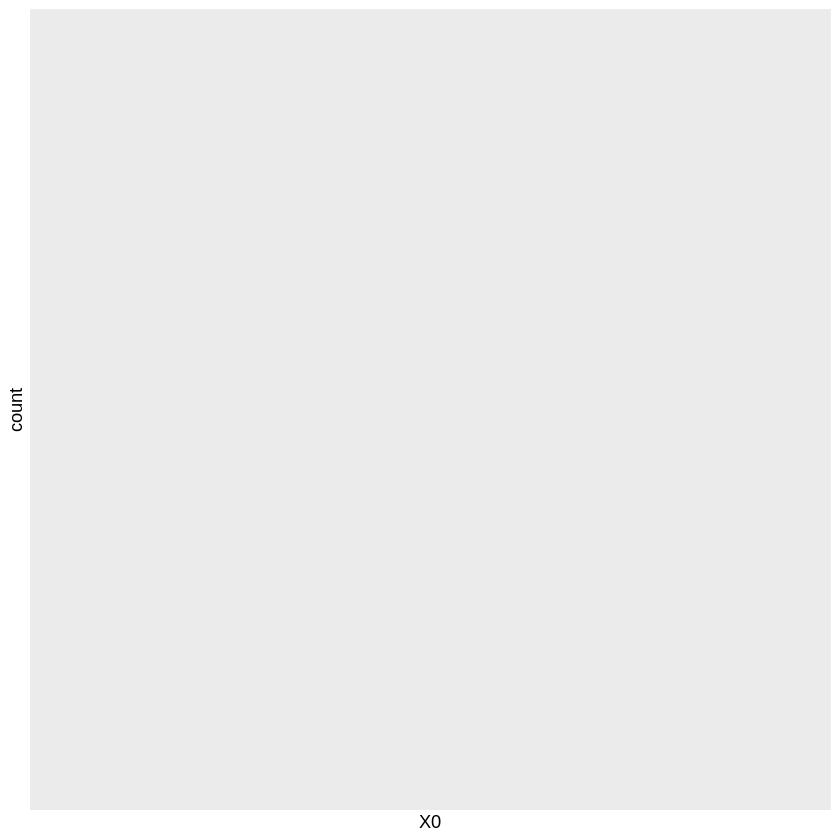

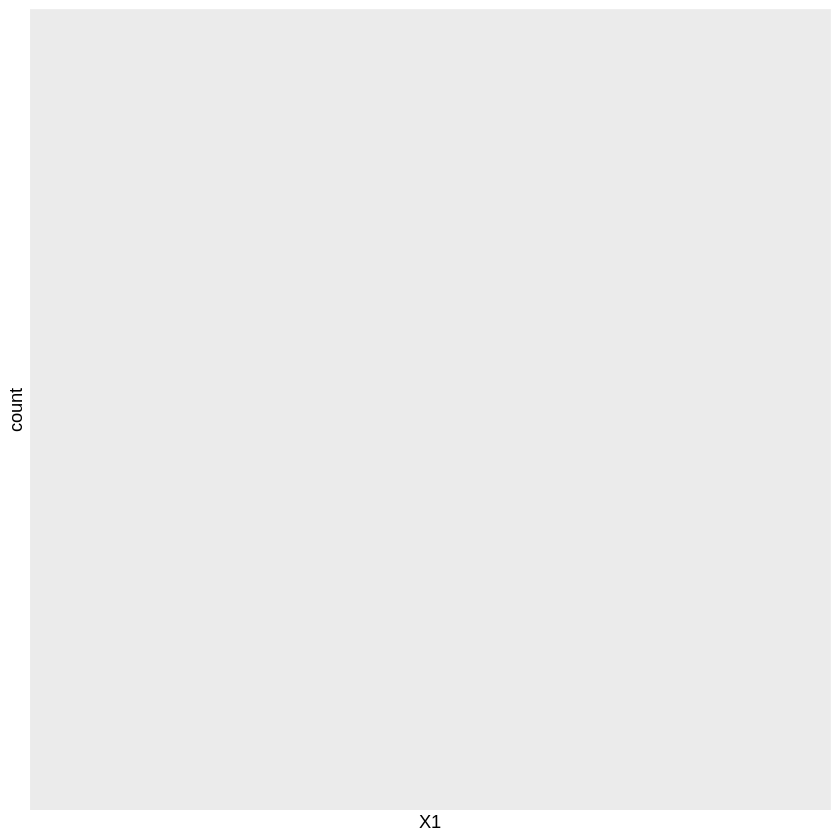

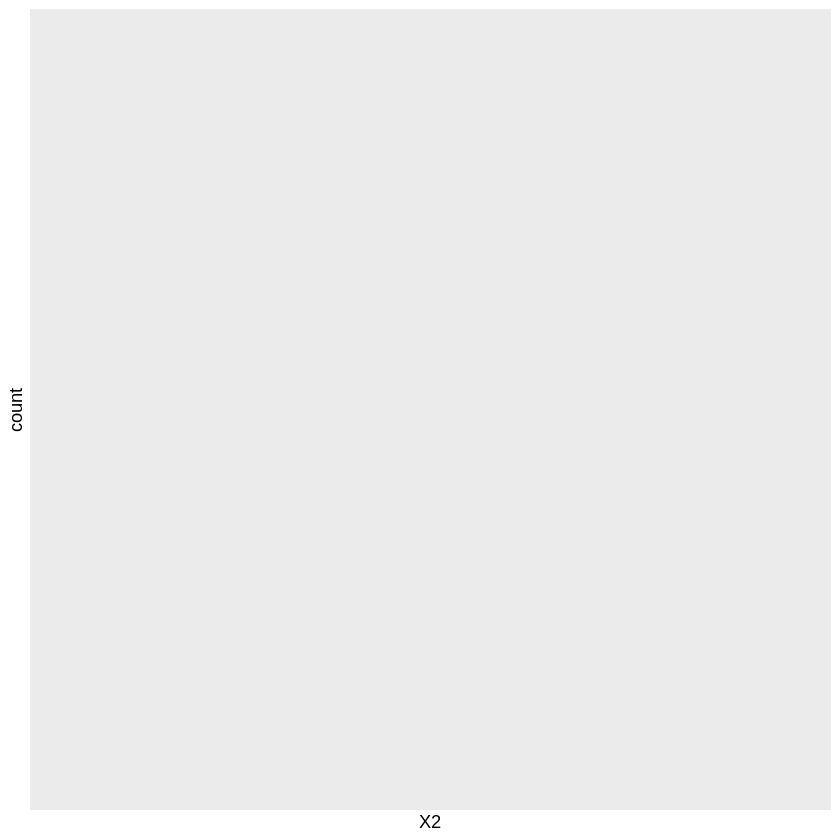

In [22]:
library(ggplot2)


ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X0,color=DoE))+
  geom_histogram(fill="white",bins=10)

ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X1,color=DoE))+
  geom_histogram(fill="white",bins=10)

ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X2,color=DoE))+
  geom_histogram(fill="white",bins=10)

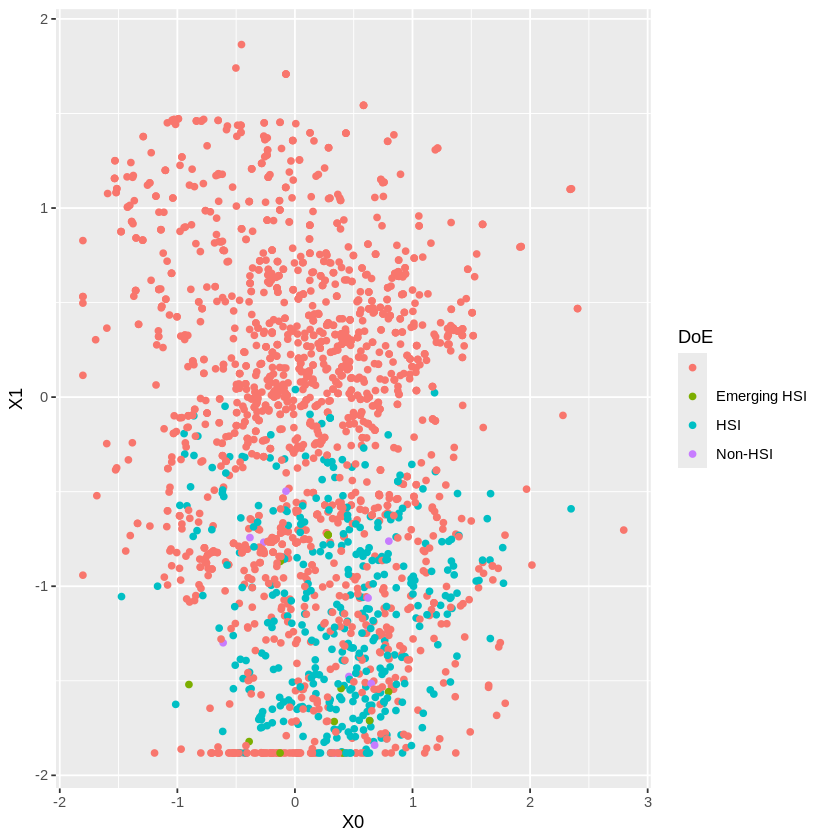

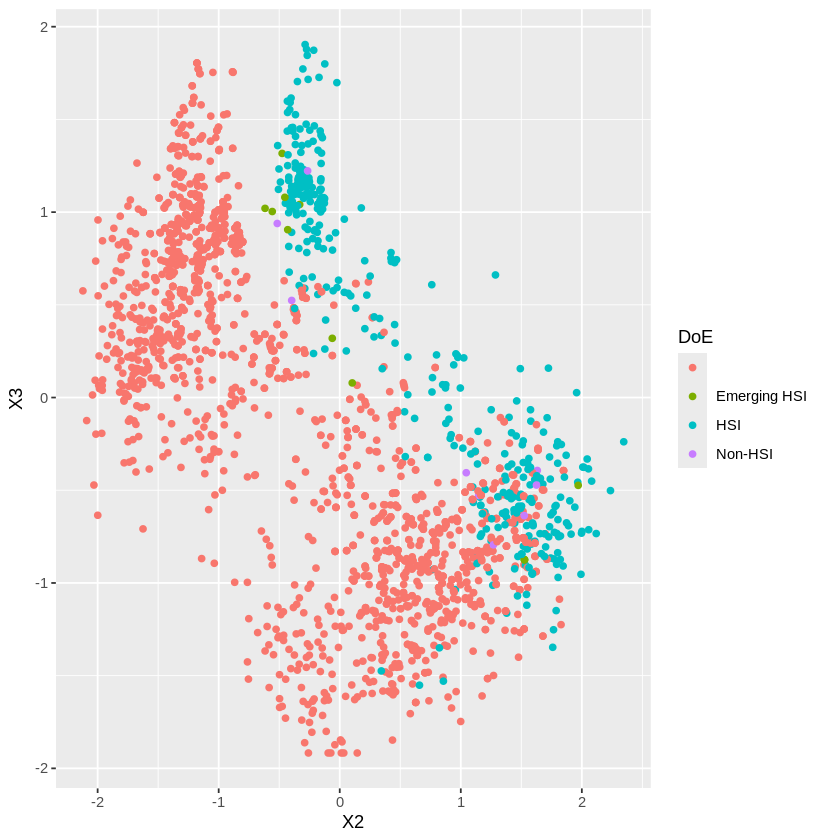

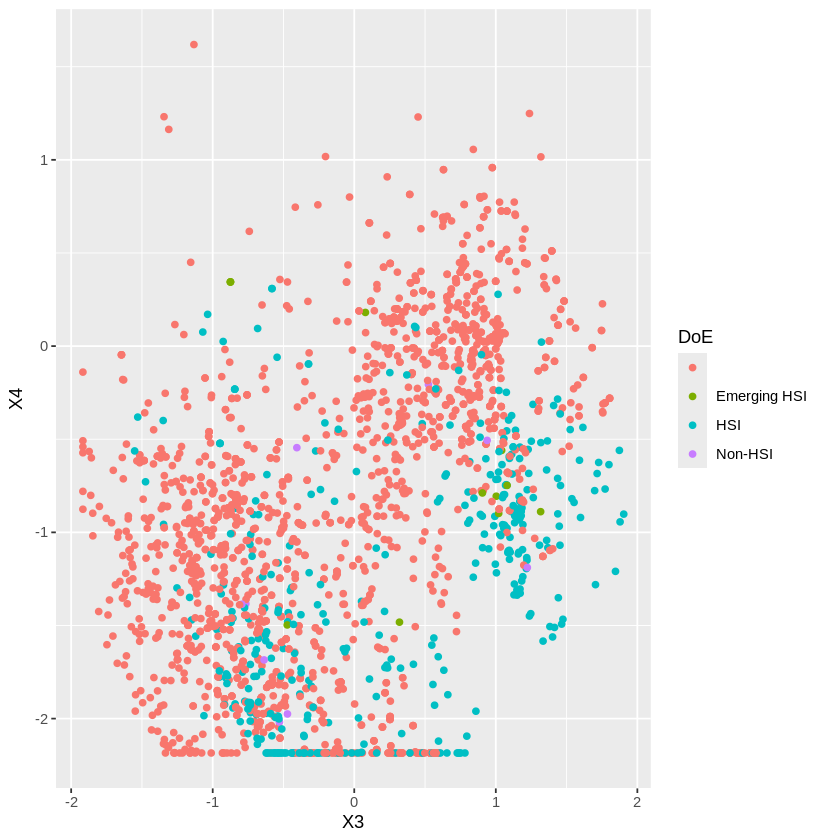

In [23]:
ggplot(dat.hsi,aes(x=X0,y=X1,color=DoE))+
  geom_point()

ggplot(dat.hsi,aes(x=X2,y=X3,color=DoE))+
  geom_point()

ggplot(dat.hsi,aes(x=X3,y=X4,color=DoE))+
  geom_point()

In [24]:
install.packages("flexmix")
library(flexmix)
#

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,unitid,year,X0,X1,X2,X3
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
460,104160,2017,0.7548172,-1.619431,-0.4107691,1.0279785
477,104346,2017,0.6835865,-1.587726,-0.3287752,1.4484595
490,104425,2017,0.5974091,-1.381697,-0.3128267,1.3592262
533,104708,2017,-0.6141764,-1.767799,-0.1800469,0.8156468
552,105145,2017,0.3315284,-1.251759,-0.2464842,0.9499032
602,105428,2017,-0.2910273,-1.748884,-0.2278189,0.6501178


3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *
3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *


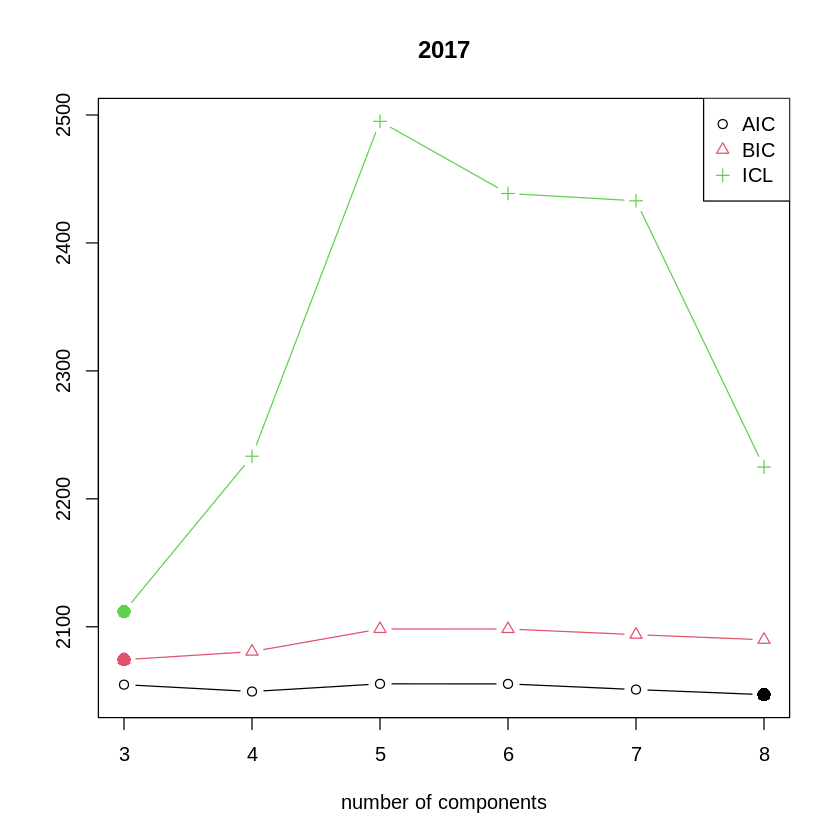

3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *


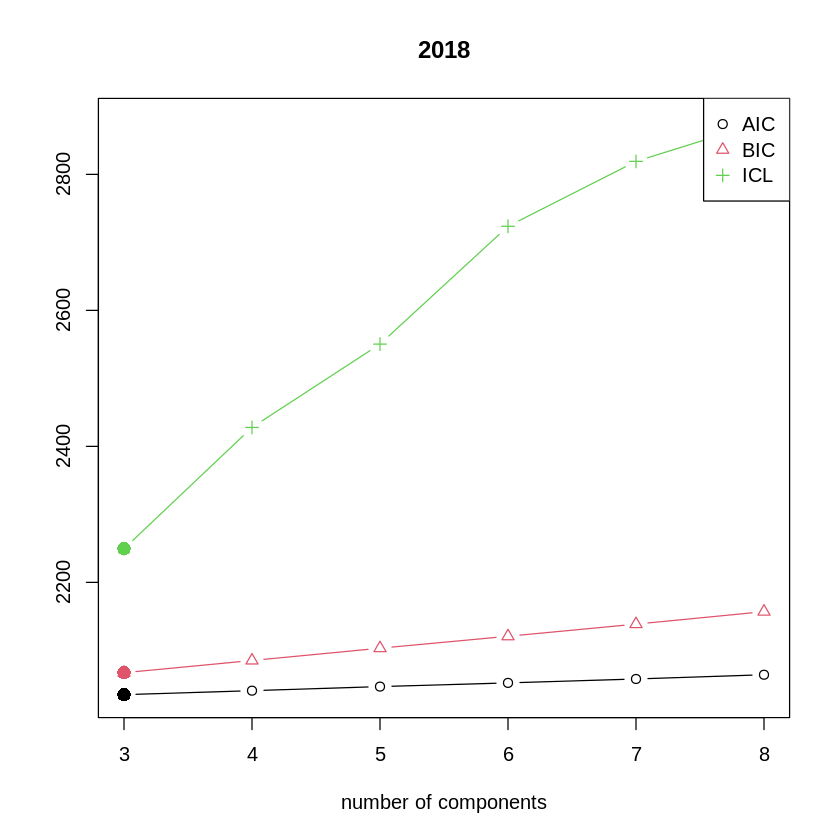

3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *


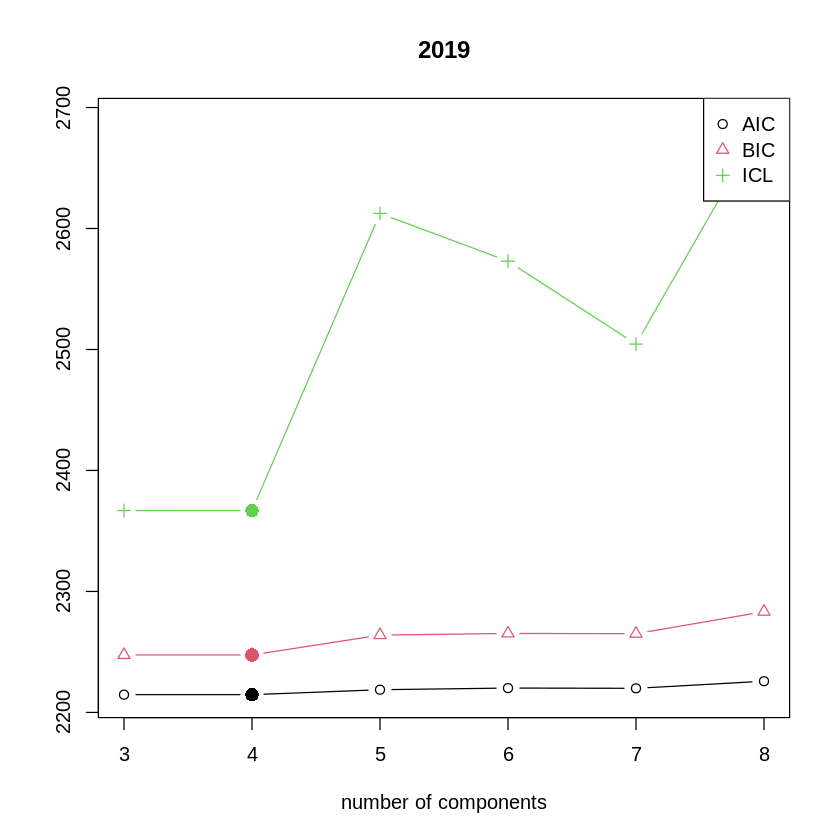

3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *


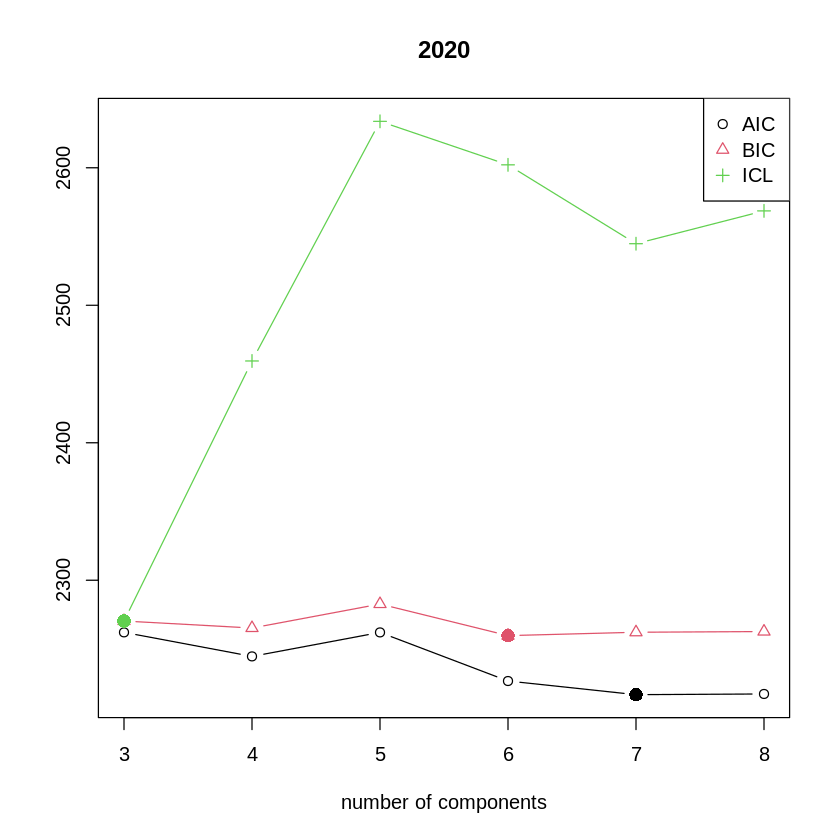

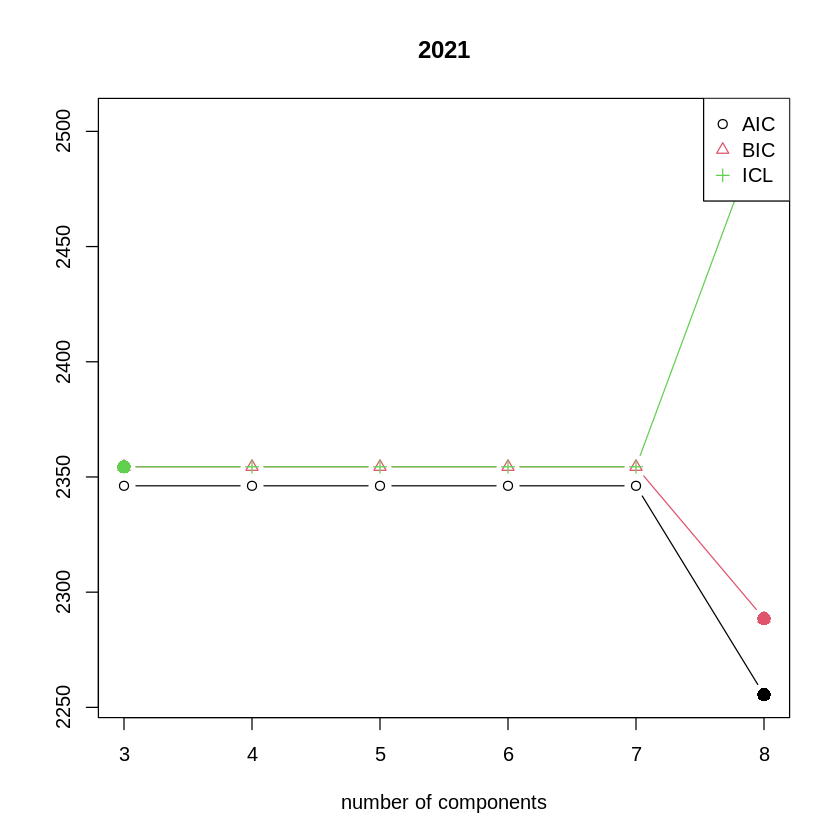

In [45]:

# Fit a GMM with 2 latent classes and linear growth trajectories
# The FLXMRglm driver is used for standard linear models within each class.
# The formula specifies the growth model.
# k specifies the number of latent classes.
# cluster is used to group observations by individual for longitudinal data.
#model_gmm <- flexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ year_x | unitid, data = dat.hsi, k = 2, model = FLXMRglm())
#summary(model_gmm)
# You can also try different numbers of classes and compare models using BIC or ICL:

#ex2 <- initFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ year_x | unitid,data = dat.hsi, k = 2:5, model = FLXMCmvnorm(diagonal = FALSE),
#                   control = list(minprior = 0), nrep = 2)
#ex2
#plot(ex2)

head(dat.hsi[dat.hsi$year=="2017",c("unitid","year","X0","X1","X2","X3")])

set.seed(32335)
gmm2017 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2017",], k = 3:8, model = FLXMRglm())
plot(gmm2017,main="2017") # Visualize BIC/ICL values

gmm2018 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2018",], k = 3:8, model = FLXMRglm())
plot(gmm2018,main="2018") # Visualize BIC/ICL values

gmm2019 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2019",], k = 3:8, model = FLXMRglm())
plot(gmm2019,main="2019") # Visualize BIC/ICL values

gmm2020 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2020",], k = 3:8, model = FLXMRglm())
plot(gmm2020,main="2020") # Visualize BIC/ICL values

gmm2021 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2021",], k = 3:8, model = FLXMRglm())
plot(gmm2021,main="2021") # Visualize BIC/ICL values


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2017", ], model = FLXMRglm(), k = 5)

       prior size post>0  ratio
Comp.1 0.265  117    357 0.3277
Comp.2 0.112   31    365 0.0849
Comp.3 0.343  160    326 0.4908
Comp.4 0.280   57    357 0.1597

'log Lik.' -1016.687 (df=11)
AIC: 2055.374   BIC: 2098.273 


,Comp.1,Comp.2,Comp.3,Comp.4
coef.(Intercept),1.434413,9.135335,-2.990365,0.5675596
sigma,2.224137,8.471707,1.734929,2.5685610


[1] 4 4 4 1 3 1 1 1 1 1 3 1 3 1 4 4 1 1 2 1 1 2 1 2 2 2 2 2 2 3 4 1 1 1 1 1 3
 [38] 1 1 4 1 1 1 1 3 1 3 1 1 1 3 1 3 1 3 1 3 4 3 1 1 1 3 1 1 1 1 3 1 3 4 3 1 1
 [75] 3 1 4 3 1 3 4 1 1 4 1 1 1 1 1 4 2 4 1 1 1 1 3 1 3 3 1 3 1 4 1 1 3 4 3 4 4
[112] 3 3 3 3 4 3 4 4 1 3 2 3 2 2 3 3 2 3 1 3 3 3 2 1 1 1 1 3 3 4 3 3 3 1 4 3 4
[149] 3 4 1 1 1 3 3 3 1 4 4 1 1 3 1 4 1 4 3 3 3 3 2 3 2 3 3 3 2 3 3 4 3 3 3 3 3
[186] 3 2 1 1 4 1 1 1 1 4 1 1 1 3 3 3 3 3 1 3 3 1 3 3 3 4 1 1 4 2 3 3 1 3 2 4 3
[223] 4 4 4 4 1 3 2 4 3 3 3 2 3 3 4 1 1 3 4 1 1 2 3 3 2 3 1 2 2 3 3 2 1 3 1 4 3
[260] 3 3 3 3 3 3 3 1 3 3 3 3 3 4 3 3 2 3 3 3 1 4 4 4 4 3 3 3 3 3 3 3 3 1 3 3 4
[297] 3 3 1 3 2 3 4 1 2 3 3 1 3 2 3 1 3 3 3 3 1 1 3 3 3 3 1 3 1 3 1 1 4 3 1 4 3
[334] 3 3 3 3 3 3 3 3 3 3 1 3 1 4 4 3 3 3 3 3 1 3 3 4 1 3 3 4 4 1 1 1

[1] 365 527

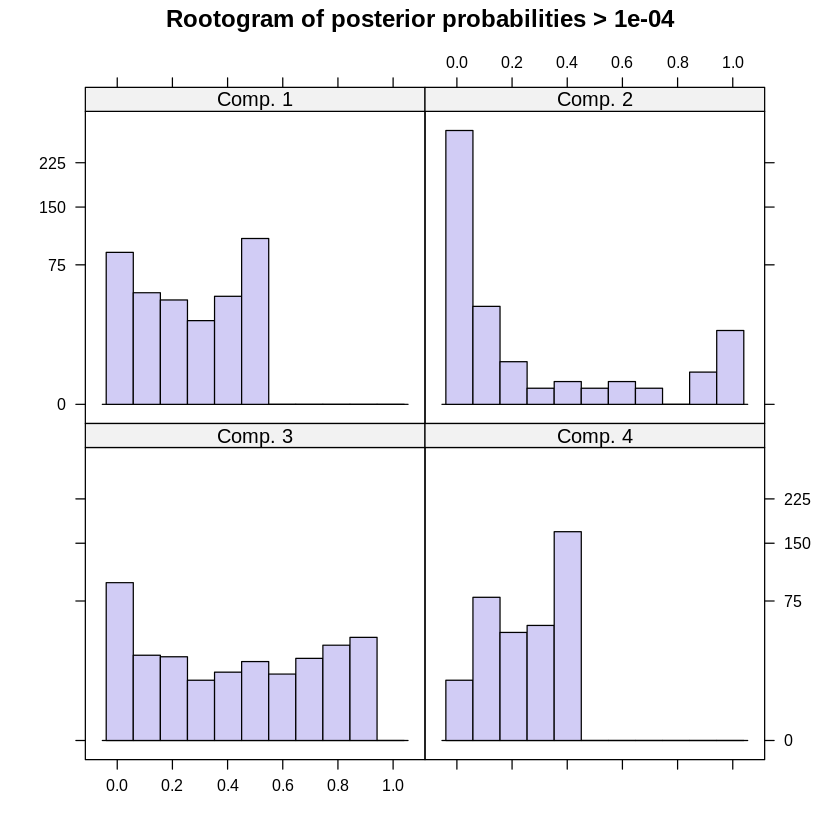

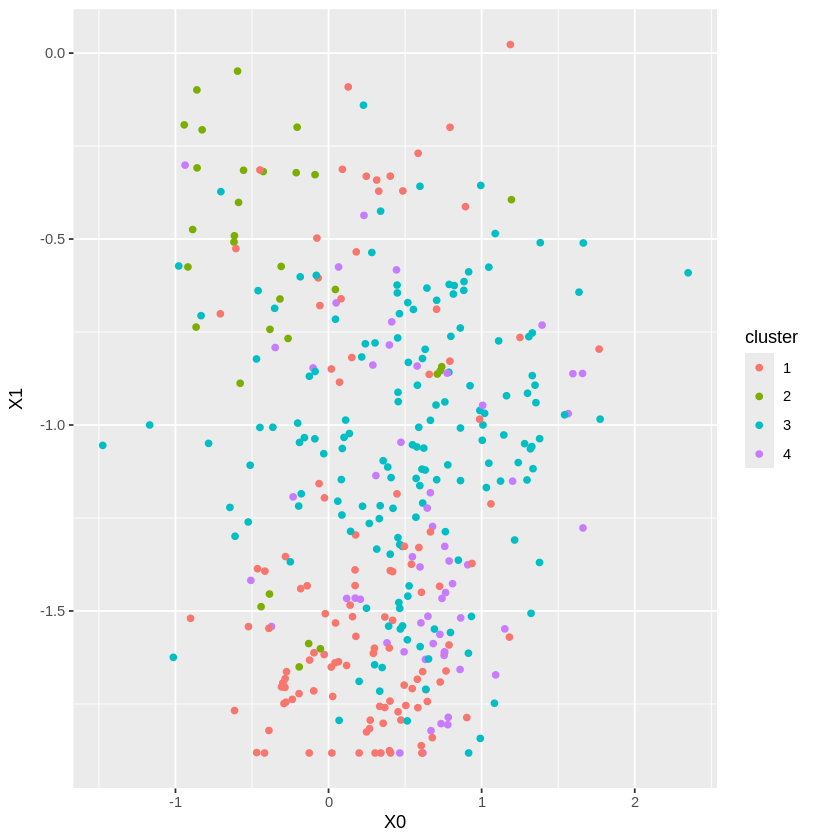

In [47]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2017.3 <- getModel(gmm2017, which =3)
summary(gmm2017.3)
parameters(gmm2017.3)
clusters(gmm2017.3)
# Plot the extracted model
plot(gmm2017.3)

dat17=dat.hsi[dat.hsi$year=="2017",]
dim(dat17)
dat17$cluster=as.character(clusters(gmm2017.3))

ggplot(dat17,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2018", ], model = FLXMRglm(), k = 5)

        prior size post>0  ratio
Comp.1 0.4489  258    390 0.6615
Comp.2 0.1882  145    408 0.3554
Comp.3 0.1453    0    415 0.0000
Comp.4 0.1390    0    414 0.0000
Comp.5 0.0785   15    418 0.0359

'log Lik.' -1009.343 (df=14)
AIC: 2046.686   BIC: 2103.182 


[1] 418 527

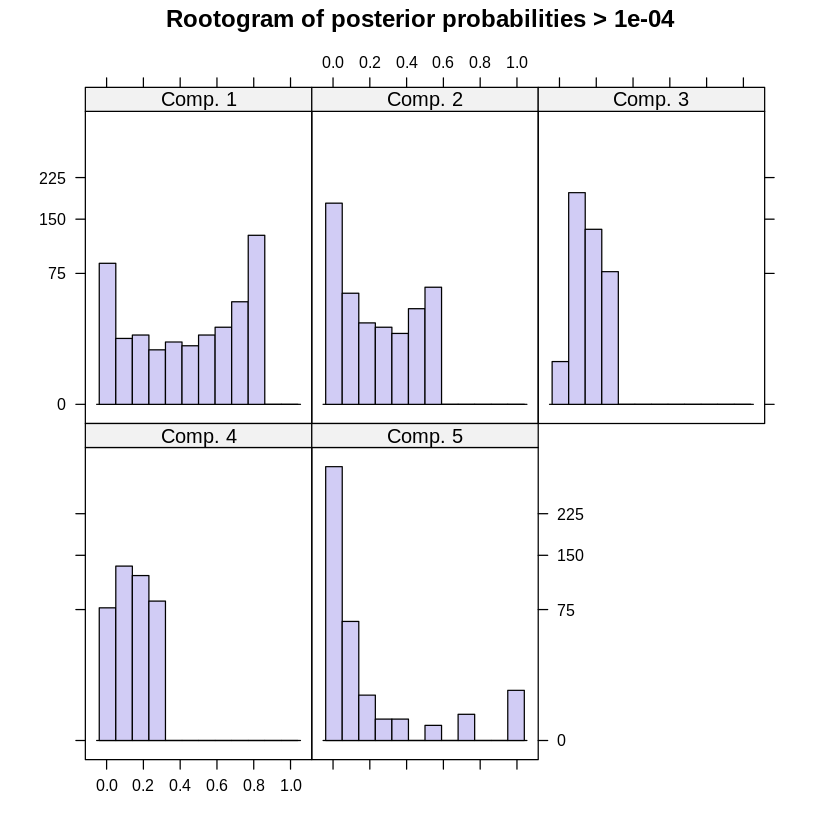

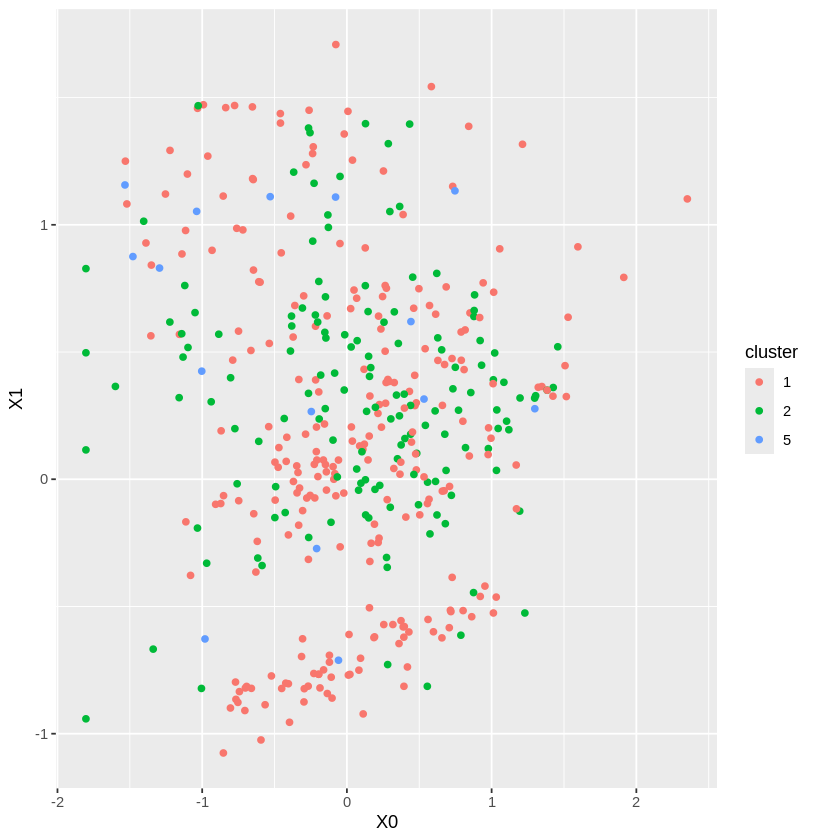

In [48]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2018.3 <- getModel(gmm2018, which =3)
summary(gmm2018.3)
# Plot the extracted model
plot(gmm2018.3)

dat18=dat.hsi[dat.hsi$year=="2018",]
dim(dat18)
dat18$cluster=as.character(clusters(gmm2018.3))

ggplot(dat18,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2019", ], model = FLXMRglm(), k = 6)

        prior size post>0  ratio
Comp.1 0.3076  114    436 0.2615
Comp.2 0.1986   93    337 0.2760
Comp.3 0.0826   23    448 0.0513
Comp.4 0.4112  218    404 0.5396

'log Lik.' -1099.06 (df=11)
AIC: 2220.119   BIC: 2265.272 


[1] 448 527

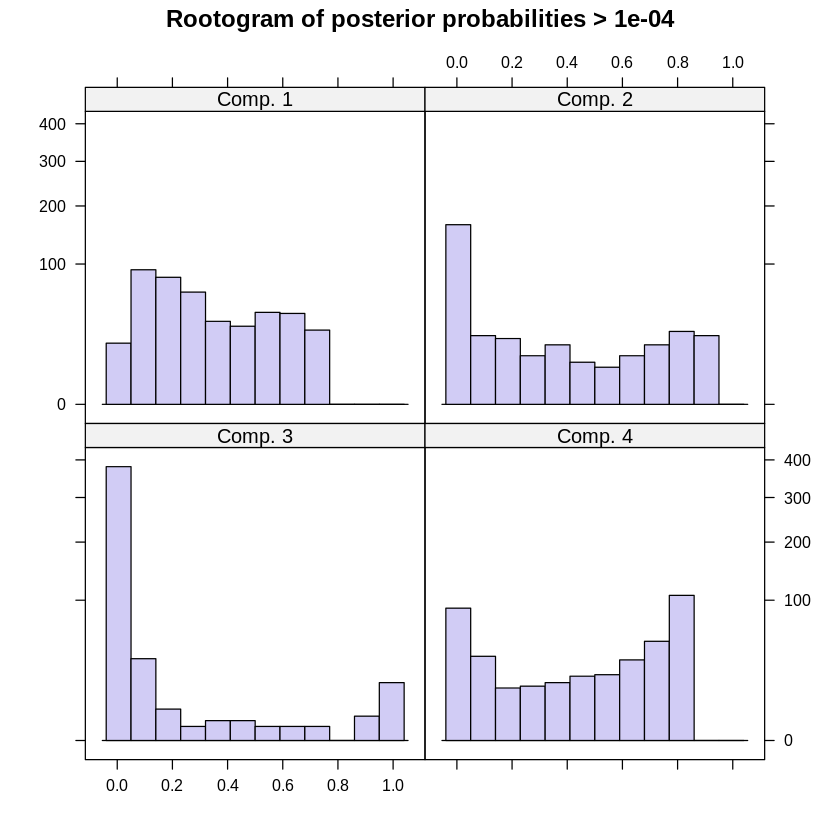

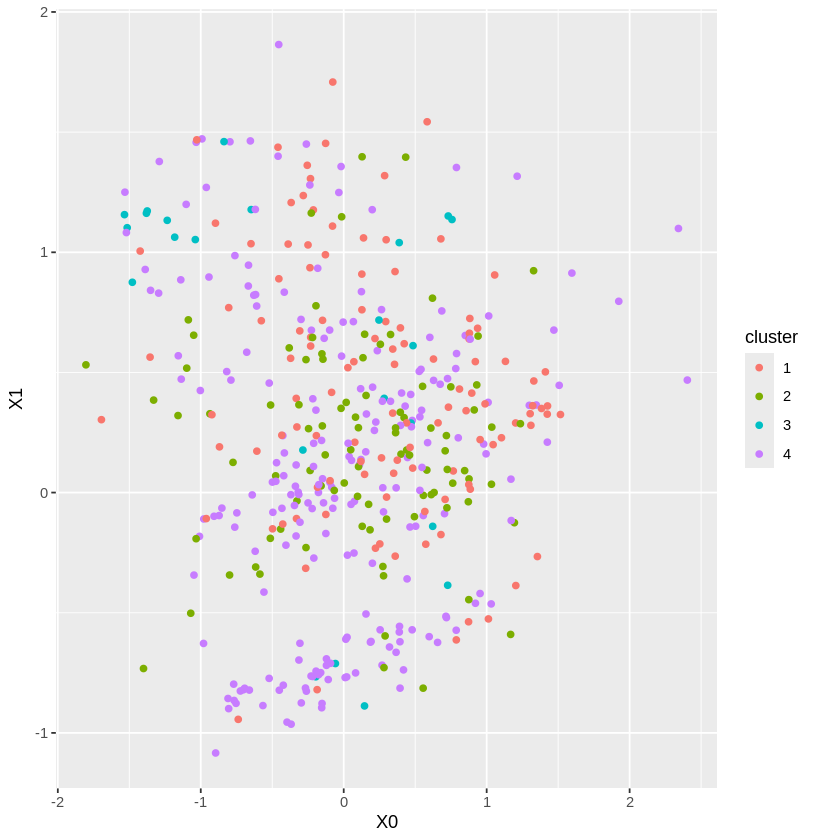

In [49]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2019.3 <- getModel(gmm2019, which =4)
summary(gmm2019.3)
# Plot the extracted model
plot(gmm2019.3)

dat19=dat.hsi[dat.hsi$year=="2019",]
dim(dat19)
dat19$cluster=as.character(clusters(gmm2019.3))

ggplot(dat19,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2020", ], model = FLXMRglm(), k = 6)

       prior size post>0 ratio
Comp.1 0.458  274    444 0.617
Comp.2 0.234  138    386 0.358
Comp.3 0.308   46    458 0.100

'log Lik.' -1105.359 (df=8)
AIC: 2226.717   BIC: 2259.732 


[1] 458 527

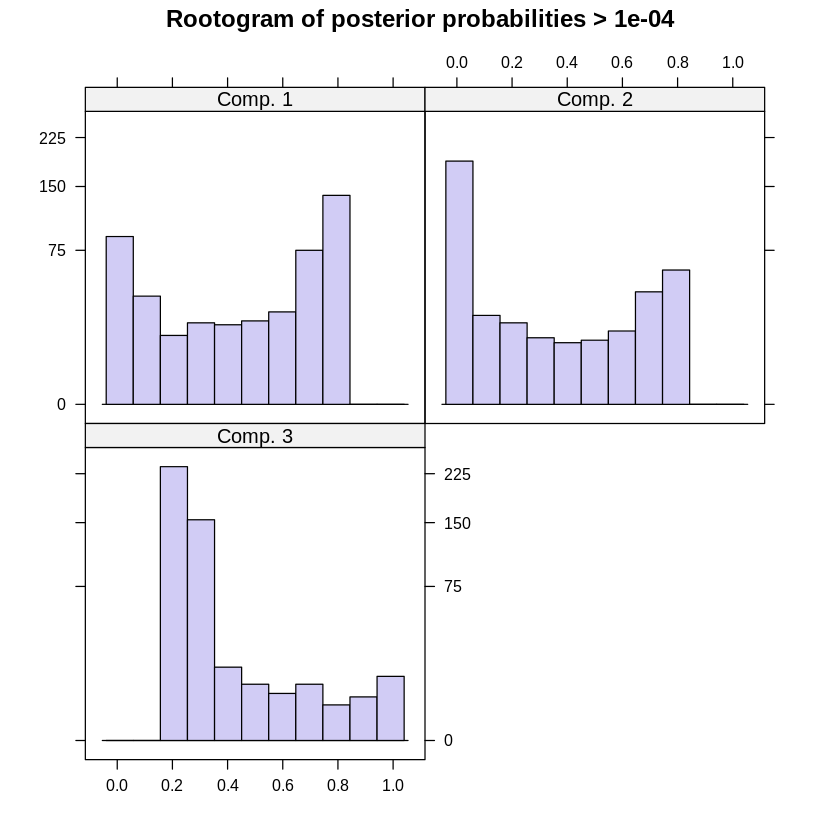

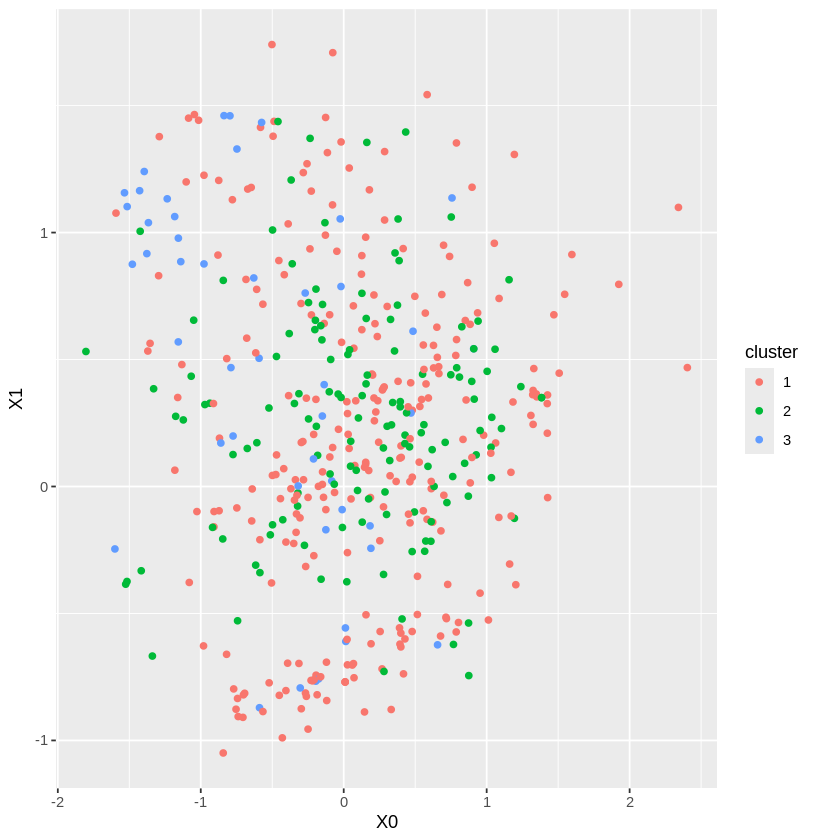

In [52]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2020.3 <- getModel(gmm2020, which =4)
summary(gmm2020.3)
# Plot the extracted model
plot(gmm2020.3)

dat20=dat.hsi[dat.hsi$year=="2020",]
dim(dat20)
dat20$cluster=as.character(clusters(gmm2020.3))

ggplot(dat20,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2021", ], model = FLXMRglm(), k = 8)

        prior size post>0  ratio
Comp.1 0.5302  226    450 0.5022
Comp.2 0.0541   15    458 0.0328
Comp.3 0.4157  217    445 0.4876

'log Lik.' -1119.758 (df=8)
AIC: 2255.517   BIC: 2288.532 


[1] 458 527

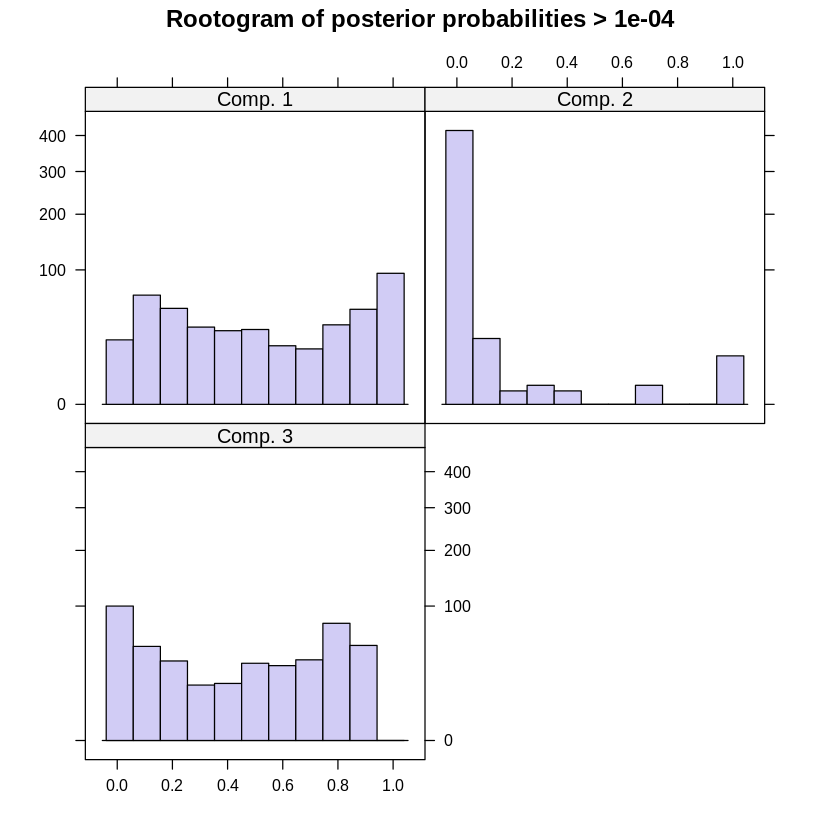

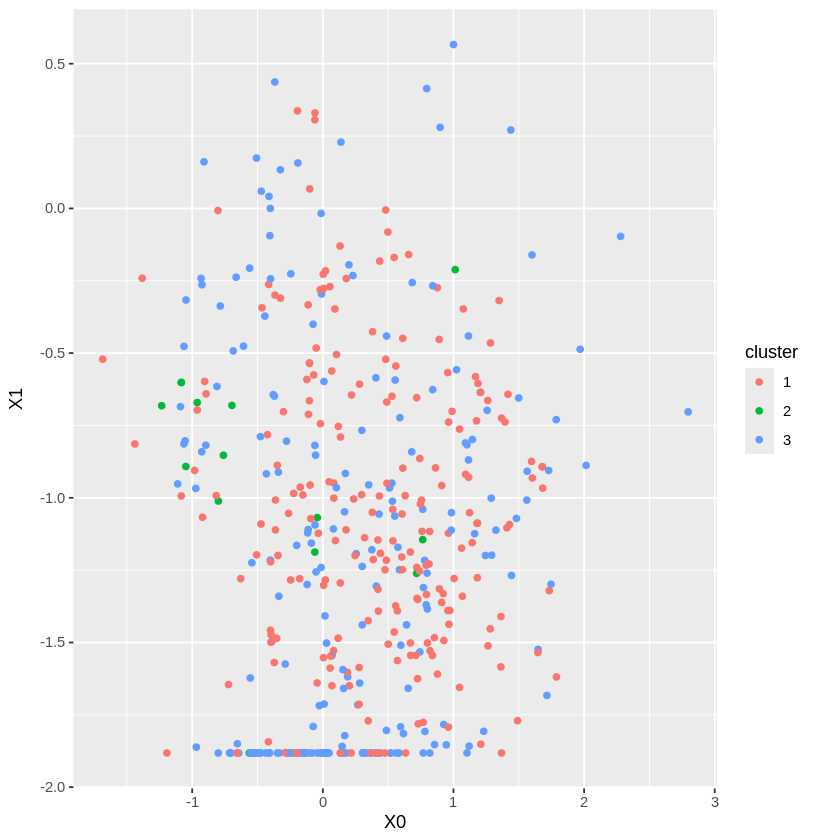

In [57]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2021.3 <- getModel(gmm2021, which =6)
summary(gmm2021.3)
# Plot the extracted model
plot(gmm2021.3)

dat21=dat.hsi[dat.hsi$year=="2021",]
dim(dat21)
dat21$cluster=as.character(clusters(gmm2021.3))

ggplot(dat21,aes(x=X0,y=X1,color=cluster))+
  geom_point()

This will rerun the GMMs but using the original non-autoencoder variables....this is part validation and part alternative mode of analysis

In [59]:
write.csv(dat17,"results17.csv")
write.csv(dat18,"results18.csv")
write.csv(dat19,"results19.csv")
write.csv(dat20,"results20.csv")
write.csv(dat21,"results21.csv")


In [44]:
install.packages("mice")
library(mice)
dat.hsi2=scale(dat.hsi)
imp=mice(dat.hsi2)
dat.hsi3=complete(imp,"long")
dat.hsi4=na.omit(dat.hsi3)
head(dat.hsi4)
dim(dat.hsi4)
set.seed(32335)



gmm2017 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi4[dat.hsi4$year=="2017",], k = 2:5, model = FLXMRglm())
plot(gmm2017,main="2017") # Visualize BIC/ICL values

gmm2018 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10  ~ 1 | unitid, data = dat.hsi4[dat.hsi4$year=="2018",], k = 2:5, model = FLXMRglm())
plot(gmm2018,main="2018") # Visualize BIC/ICL values

gmm2019 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10  ~ 1 | unitid, data = dat.hsi4[dat.hsi4$year=="2019",], k = 2:5, model = FLXMRglm())
plot(gmm2019,main="2019") # Visualize BIC/ICL values

gmm2020 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10  ~ 1 | unitid, data = dat.hsi4[dat.hsi4$year=="2020",], k = 2:5, model = FLXMRglm())
plot(gmm2020,main="2020") # Visualize BIC/ICL values

gmm2021 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10  ~ 1 | unitid, data = dat.hsi4[dat.hsi4$year=="2021",], k = 2:5, model = FLXMRglm())
plot(gmm2021,main="2021") # Visualize BIC/ICL values

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error in colMeans(x, na.rm = TRUE): 'x' must be numeric
